Array 1 - Slope: 0.6000000000000001, Intercept: 2.1999999999999997
Array 2 - Slope: 0.8999999999999996, Intercept: 1.2


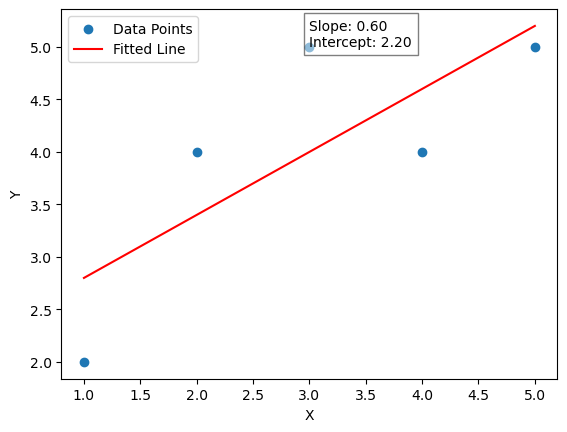

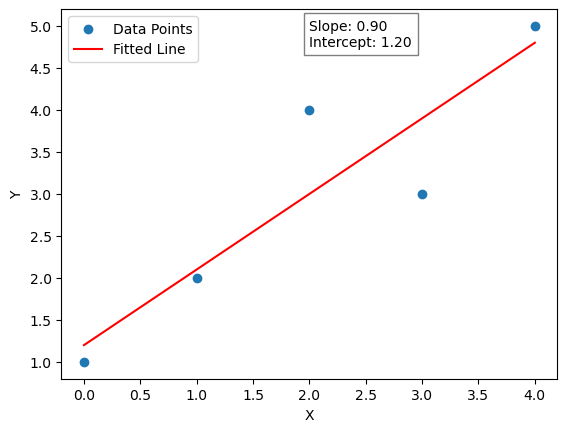

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def least_square_fit(x, y):
    # Calculate the slope and intercept using numpy's polyfit
    slope, intercept = np.polyfit(x, y, 1)
    return slope, intercept

def plot_scatter_and_line(x, y, slope, intercept):
    # Plot the scatter plot
    plt.scatter(x, y, label='Data Points')

    # Plot the fitted line
    fitted_line = slope * x + intercept
    plt.plot(x, fitted_line, color='red', label='Fitted Line')

    # Display the slope and intercept values on the plot
    plt.text(0.5, 0.9, f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}', 
             transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

    # Set labels and legend
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    # Show the plot
    plt.show()

def main():
    # Test the least_square_fit function with example arrays
    x1 = np.array([1, 2, 3, 4, 5])
    y1 = np.array([2, 4, 5, 4, 5])
    slope1, intercept1 = least_square_fit(x1, y1)
    print(f"Array 1 - Slope: {slope1}, Intercept: {intercept1}")

    x2 = np.array([0, 1, 2, 3, 4])
    y2 = np.array([1, 2, 4, 3, 5])
    slope2, intercept2 = least_square_fit(x2, y2)
    print(f"Array 2 - Slope: {slope2}, Intercept: {intercept2}")

    # Plot scatter plots and fitted lines
    plot_scatter_and_line(x1, y1, slope1, intercept1)
    plot_scatter_and_line(x2, y2, slope2, intercept2)

if __name__ == "__main__":
    main()


In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def unknown_data(file_path):
    # Read the data from the CSV file
    data = pd.read_csv(file_path)

    # Separate features (X) and response (y)
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    # Initialize the Linear Regression model
    model = LinearRegression()

    # Fit the model using all the data
    model.fit(X, y)

    # Get the coefficients for each feature
    coefficients = model.coef_

    # Print the coefficient for each feature
    for i, coef in enumerate(coefficients):
        print(f"Coefficient for Feature X{i+1}: {coef}")

    return coefficients

if __name__ == "__main__":
    # Specify the path to the unknown data file
    file_path = "data/AB0208_unknown_data.csv"

    # Call the unknown_data function
    coefficients = unknown_data(file_path)

    # You can analyze the coefficients to determine feature importance or if some features could be dropped
    # Features with coefficients close to zero may have less impact on the response


# Determining whether to drop features from a model requires analyzing the coefficients obtained from the linear regression model. The coefficients indicate the strength and direction of the relationship between each feature and the response variable. Here are some considerations:

# Magnitude of Coefficients: If the magnitude of the coefficient for a particular feature is close to zero, it suggests that the feature has a weak impact on the response. In such cases, dropping the feature may not significantly affect the model's performance.

# Sign of Coefficients: The sign of the coefficients indicates the direction of the relationship. A positive coefficient implies a positive correlation with the response, while a negative coefficient implies a negative correlation. If the sign is opposite to what is expected based on domain knowledge, it might be worth investigating further.

# Correlation Between Features: If two or more features are highly correlated, meaning they convey similar information, it might be redundant to keep both in the model. Redundant features can lead to multicollinearity issues.

# Domain Knowledge: Consideration of domain-specific knowledge is crucial. Features that are irrelevant or don't make sense in the context of the problem should be carefully evaluated.

# Model Performance: If dropping a feature doesn't significantly impact the model's performance, it might be a candidate for removal. However, this should be assessed using appropriate metrics and validation techniques.

Coefficient for Feature X1: -1.9371881327788475e-15
Coefficient for Feature X2: -11.00000000000001
Coefficient for Feature X3: -1.9999999999999927
Coefficient for Feature X4: -9.00000000000001
Coefficient for Feature X5: 20.000000000000004


The most influential feature on 'general satisfaction' is 'service' with correlation coefficient: 0.11367688697964548


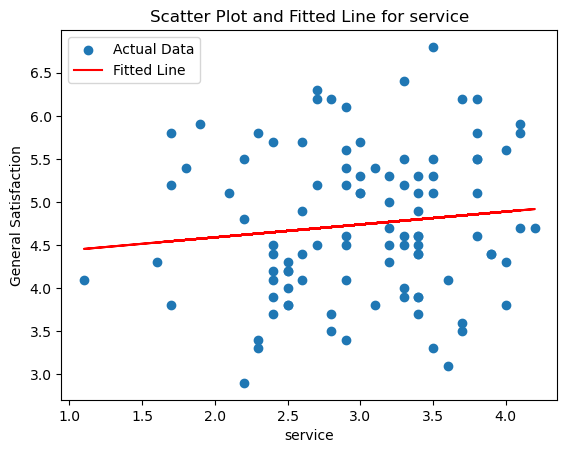

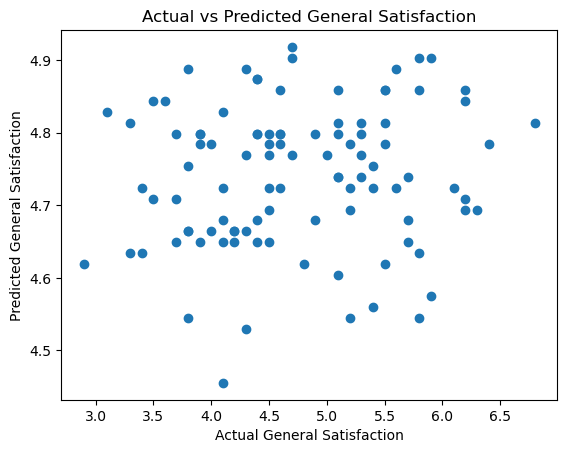

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load data from the text file
file_path = "data/AB0208_query.txt"
df = pd.read_csv(file_path)

# a) Find the most influential feature based on correlation coefficients
correlations = df.corr()['general satisfaction'].drop('general satisfaction')
most_influential_feature = correlations.idxmax()
print(f"The most influential feature on 'general satisfaction' is '{most_influential_feature}' with correlation coefficient: {correlations[most_influential_feature]}")

# b) Fit a linear model using the most influential feature and plot the results
X = df[[most_influential_feature]]
y = df['general satisfaction']

# Fit linear model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plot scatter plot with general satisfaction against the most influential feature
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.xlabel(most_influential_feature)
plt.ylabel('General Satisfaction')
plt.title(f'Scatter Plot and Fitted Line for {most_influential_feature}')
plt.legend()
plt.show()

# Plot scatter plot with actual vs predicted general satisfaction values
plt.scatter(y, y_pred)
plt.xlabel('Actual General Satisfaction')
plt.ylabel('Predicted General Satisfaction')
plt.title('Actual vs Predicted General Satisfaction')
plt.show()


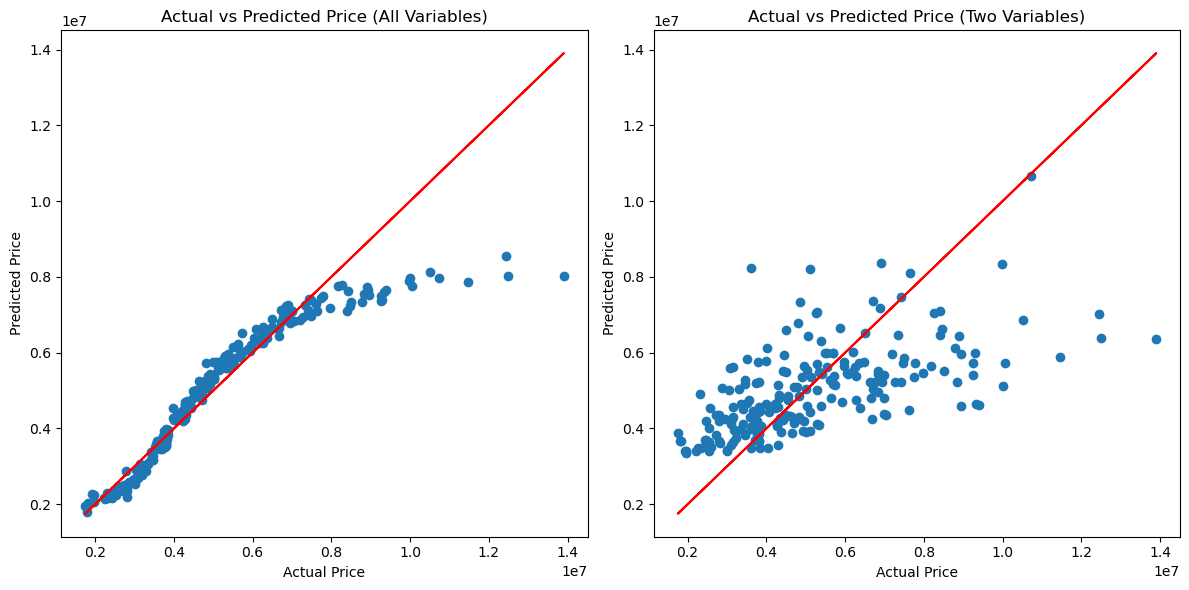

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = "data/AB0208_houses.csv"
houses_df = pd.read_csv(file_path)

# Convert yes/no to 1/0
houses_df.replace({'yes': 1, 'no': 0}, inplace=True)

# Add dummy variables for furnishing status
furnishing_dummies = pd.get_dummies(houses_df['furnishingstatus'], prefix='furnishing')
houses_df = pd.concat([houses_df, furnishing_dummies], axis=1)
houses_df.drop('furnishingstatus', axis=1, inplace=True)

# Split the data into train and test sets
X = houses_df.drop('price', axis=1)
y = houses_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit a linear model to the train data and predict the test data
model_all_variables = LinearRegression()
model_all_variables.fit(X_train, y_train)
y_pred_all_variables = model_all_variables.predict(X_test)

# Fit a linear model with only two explanatory variables
X_train_two_variables = X_train[['area', 'bedrooms']]
X_test_two_variables = X_test[['area', 'bedrooms']]
model_two_variables = LinearRegression()
model_two_variables.fit(X_train_two_variables, y_train)
y_pred_two_variables = model_two_variables.predict(X_test_two_variables)

# Plot real against predicted for both cases
plt.figure(figsize=(12, 6))

# Plot for all variables
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_all_variables)
plt.plot(y_test, y_test, color='red')  # Plotting the diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (All Variables)')

# Plot for two variables
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_two_variables)
plt.plot(y_test, y_test, color='red')  # Plotting the diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Two Variables)')

plt.tight_layout()
plt.show()


In [34]:
# 1. Overfitting:
# Definition:
# Overfitting occurs when a machine learning model learns the training data too well, capturing noise or random fluctuations in the data rather than the underlying patterns. As a result, the model may perform well on the training set but fails to generalize to new, unseen data.

# Example:
# Consider a polynomial regression model with a very high degree. It might fit the training data perfectly, creating a curve that passes through every training point. However, this complex model may not generalize well to new data, leading to poor performance on unseen examples.

# Mitigation:

# Use simpler models with fewer parameters.
# Regularize the model by adding penalties to large coefficients.
# Increase the amount of training data.
# Use cross-validation to assess model performance on multiple subsets of the data.
# 2. Recursive Feature Elimination (RFE):
# Definition:
# RFE is a feature selection technique that recursively removes the least important features from a model until the desired number of features is reached. It relies on the idea that repeatedly training the model with a subset of features helps identify the most relevant features for prediction.

# Example:
# Suppose you have a dataset with 20 features, and you want to select the top 10 features. RFE starts with all features, fits the model, and ranks the features based on their importance. The least important feature is then removed, and the process is repeated until the desired number of features is achieved.

# 3. K-fold Cross-Validation (CV):
# Definition:
# K-fold Cross-Validation is a technique used to assess the performance of a machine learning model by dividing the dataset into K subsets or folds. The model is trained and evaluated K times, using a different fold as the test set in each iteration. The average performance across all folds provides a more robust estimate of the model's generalization performance.

# Example:
# Consider 5-fold cross-validation. The dataset is divided into five subsets, and the model is trained and evaluated five times. In each iteration, a different fold serves as the test set, and the remaining folds constitute the training set.

